In [1]:
import pandas as pd
import numpy as np

# Display all columns
pd.set_option('display.max_columns', None)

In [2]:
import warnings

warnings.filterwarnings("ignore")


# Reading dataset

Dataset is loaded into a pandas dataframe

In [3]:
dataset_df = pd.read_csv("Dataset.txt")
dataset_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# Count of occurrences

Count of various attack occurrences from the dataset

In [4]:
dataset_df["attack_category"].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_category, dtype: int64

# Loading the attack types

Attack types are loaded into a dictionary so that the classification can be performed according to the types to reduce the classes number from 23 to 5

In [5]:
attack_types_dict = {"normal": "normal"}
with open("Attack_types.txt", "r") as f:
    for line in f:
        arr = line.split(" ")
        attack_types_dict[arr[0]] = arr[1].strip()

In [6]:
dataset_df["attack_category"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [7]:
dataset_df["attack_category"] = dataset_df["attack_category"].map(attack_types_dict)

# Data after reduction of the classes

Shows the dataset after reclassification and breakdown into 5 classes

In [8]:
dataset_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos,20
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,20


# Cleaning

The data is being checked to drop a column that sums up to 0. (Has no effect on the data)

In [9]:
dataset_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [10]:
dataset_df.drop(columns=["num_outbound_cmds"])

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos,20
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,20


# Counts of classes

Shows the occurrences of classes after reclassification/labelling of the data

In [11]:
dataset_df["attack_category"].value_counts()

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_category, dtype: int64

# Preprocessing

The data columns are Label encoded that had the string/object data type to prepare it for the learning.

In [12]:
train_data = pd.get_dummies(dataset_df.drop(columns=["attack_category"]),drop_first=True)

In [13]:
train_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,0,0,0

# Data splitting

The data is being split for train and test

In [14]:
y = dataset_df["attack_category"]
x = train_data

# Scaling the data

The data is scaled for computation and training of the models.

[Data scaling resource](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

x = scaler.transform(x)

# Test Train Split

Stratification is used in splitting of the data according to the attack category class so the distribution of test and train is balanced with respect to classes. `20% Test`.

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=dataset_df["attack_category"])

# KNN voting for bonus


[KNN module documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=neighbors#sklearn.neighbors.KNeighborsClassifier)

[Tutorial](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)

In [17]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
print("K Nearest Neighbours model")
print(classification_report(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))

K Nearest Neighbours model
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00      9186
      normal       1.00      1.00      1.00     13469
       probe       1.00      0.98      0.99      2331
         r2l       0.98      0.94      0.96       199
         u2r       0.33      0.10      0.15        10

    accuracy                           1.00     25195
   macro avg       0.86      0.80      0.82     25195
weighted avg       1.00      1.00      1.00     25195

Accuracy score: 0.9962294105973407


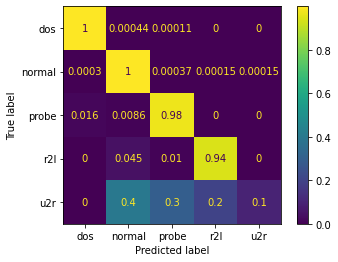

In [18]:
import matplotlib.pyplot as plt

plot_confusion_matrix(knn, x_test, y_test, normalize="true")

# Sampling 

Taking samples for plotting misclassification error to find the performance of the model.

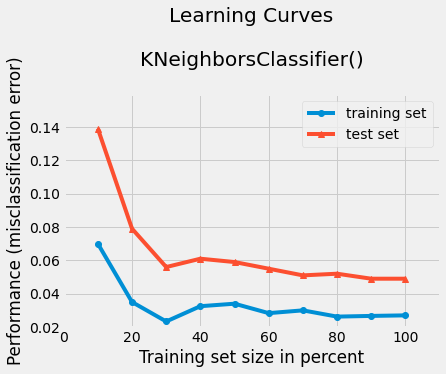

In [19]:
from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison

x_train_sample, x_test_sample = x[:1000], x[1000:2000]
y_train_sample, y_test_sample = y[:1000], y[1000:2000]

plot_learning_curves(x_train_sample, y_train_sample, x_test_sample, y_test_sample, knn)
plt.show()

# Multi-Layer Perceptron Models (ANN)

Multiple MLP models are trained and the accuracy, confusion matrix is displayed for statistical analysis.

[MLP Classifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [20]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(9,4,7), activation="relu")
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
print("Multi-Layer Perceptron Classifier model")
print(classification_report(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))

Multi-Layer Perceptron Classifier model
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00      9186
      normal       1.00      1.00      1.00     13469
       probe       0.99      0.99      0.99      2331
         r2l       0.92      0.97      0.95       199
         u2r       0.00      0.00      0.00        10

    accuracy                           1.00     25195
   macro avg       0.78      0.79      0.79     25195
weighted avg       1.00      1.00      1.00     25195

Accuracy score: 0.9968247668188133


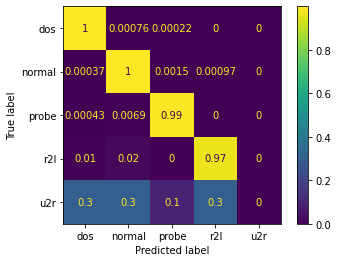

In [21]:
plot_confusion_matrix(mlp, x_test, y_test, normalize="true")

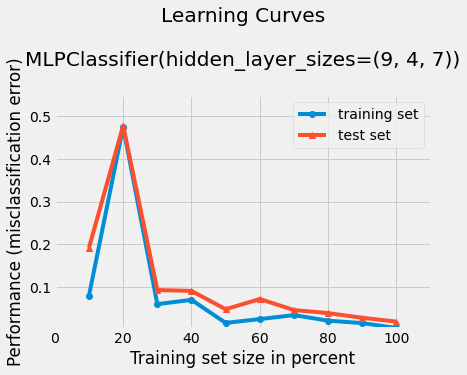

In [22]:
plot_learning_curves(x_train_sample, y_train_sample, x_test_sample, y_test_sample, mlp)
plt.show()

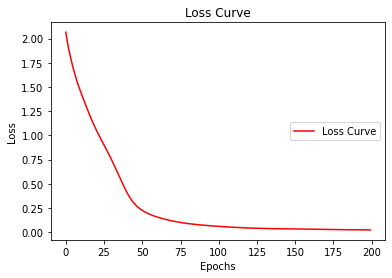

In [23]:
plt.plot(mlp.loss_curve_, color="r", label="Loss Curve")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='center right')
plt.show()

In [24]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10,4,5), activation="identity", solver="adam")
mlp2.fit(x_train,y_train)
y_pred = mlp2.predict(x_test)
print("Multi-Layer Perceptron Classifier model")
print(classification_report(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))

Multi-Layer Perceptron Classifier model
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00      9186
      normal       1.00      0.99      0.99     13469
       probe       0.98      0.98      0.98      2331
         r2l       0.89      0.96      0.92       199
         u2r       0.60      0.30      0.40        10

    accuracy                           0.99     25195
   macro avg       0.89      0.85      0.86     25195
weighted avg       0.99      0.99      0.99     25195

Accuracy score: 0.9928954157570946


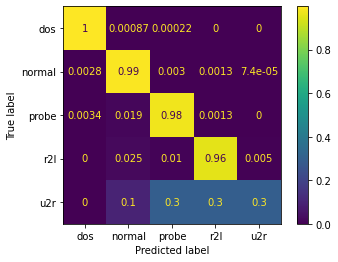

In [25]:
plot_confusion_matrix(mlp2, x_test, y_test, normalize="true")

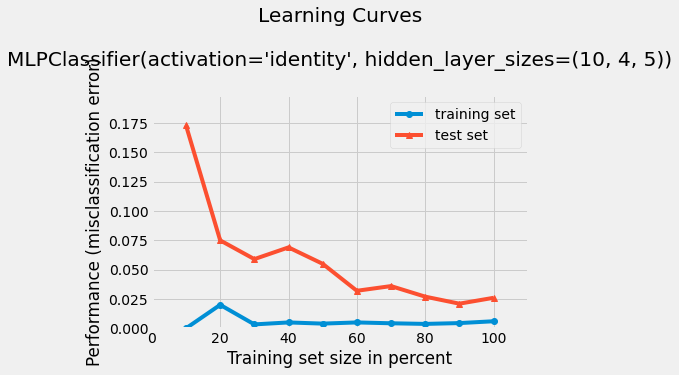

In [26]:
plot_learning_curves(x_train_sample, y_train_sample, x_test_sample, y_test_sample, mlp2)
plt.show()

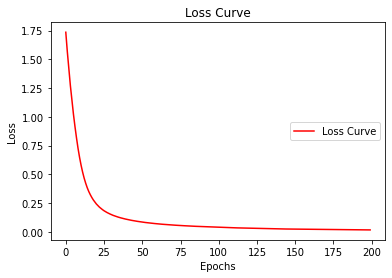

In [27]:
plt.plot(mlp2.loss_curve_, color="r", label="Loss Curve")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='center right')
plt.show()

In [28]:
mlp3 = MLPClassifier(hidden_layer_sizes=(10,12,15), activation="relu", solver="adam")
mlp3.fit(x_train,y_train)
y_pred = mlp3.predict(x_test)
print("Multi-Layer Perceptron Classifier model")
print(classification_report(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))

Multi-Layer Perceptron Classifier model
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00      9186
      normal       1.00      1.00      1.00     13469
       probe       0.99      0.99      0.99      2331
         r2l       0.95      0.97      0.96       199
         u2r       0.29      0.20      0.24        10

    accuracy                           1.00     25195
   macro avg       0.84      0.83      0.84     25195
weighted avg       1.00      1.00      1.00     25195

Accuracy score: 0.9975788846993451


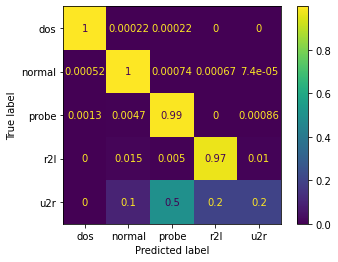

In [29]:
plot_confusion_matrix(mlp3, x_test, y_test, normalize="true")

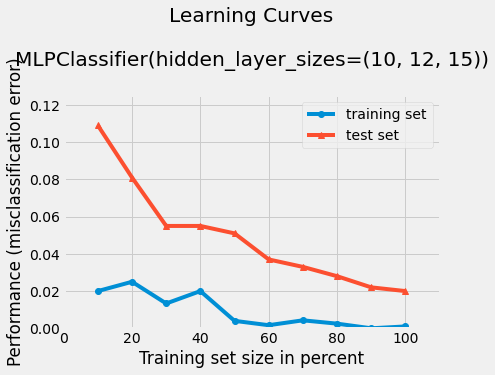

In [30]:
plot_learning_curves(x_train_sample, y_train_sample, x_test_sample, y_test_sample, mlp3)
plt.show()

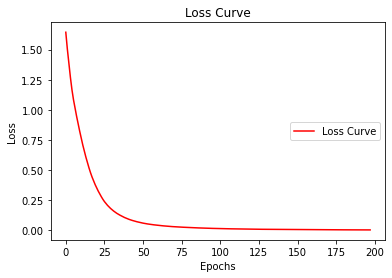

In [31]:
plt.plot(mlp3.loss_curve_, color="r", label="Loss Curve")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='center right')
plt.show()

# Ensemble Learning

A process by which multiple models, such as classifiers, are strategically generated and combined to solve a particular computational problem.

[Ensemble module documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)

In [32]:
from sklearn.ensemble import VotingClassifier

estimators = [("knn", knn), ("mlp", mlp), ("mlp2", mlp2), ("mlp3", mlp3)]
en = VotingClassifier(estimators=estimators, voting="hard")
en.fit(x_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('mlp',
                              MLPClassifier(hidden_layer_sizes=(9, 4, 7))),
                             ('mlp2',
                              MLPClassifier(activation='identity',
                                            hidden_layer_sizes=(10, 4, 5))),
                             ('mlp3',
                              MLPClassifier(hidden_layer_sizes=(10, 12, 15)))])

In [33]:
y_pred = en.predict(x_test)
print("Ensembled model")
print(classification_report(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))

Ensembled model
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00      9186
      normal       1.00      1.00      1.00     13469
       probe       1.00      0.99      1.00      2331
         r2l       0.96      0.96      0.96       199
         u2r       0.75      0.30      0.43        10

    accuracy                           1.00     25195
   macro avg       0.94      0.85      0.88     25195
weighted avg       1.00      1.00      1.00     25195

Accuracy score: 0.9982536217503473


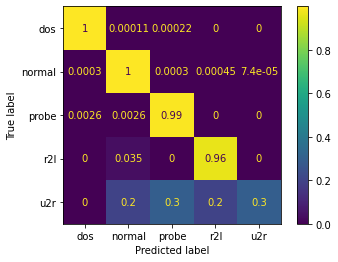

In [34]:
plot_confusion_matrix(en, x_test, y_test, normalize="true")

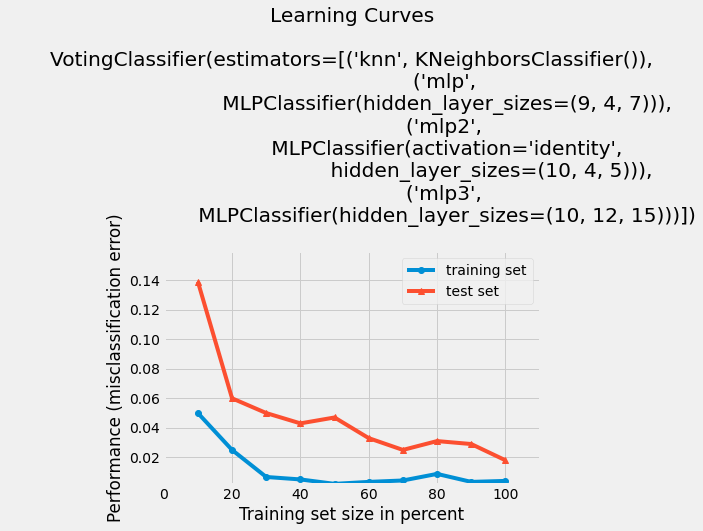

In [35]:
plot_learning_curves(x_train_sample, y_train_sample, x_test_sample, y_test_sample, en)
plt.show()

In [36]:
data_without_label = dataset_df.drop(columns=["flag", "service", "protocol_type", "attack_category"])

# K-Means clustering

The column that had classes is dropped to perform reclassification with the the help of K-Means. Since the number of clusters originally used for this dataset was supposed to be 23 so here `K=23` is used as well for 23 clusters.

[K-Means algorithm resource](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

In [37]:
from sklearn.cluster import KMeans

data_without_label = scaler.fit_transform(data_without_label)

k_means = KMeans(n_clusters=5)
k_means = k_means.fit(data_without_label)

In [38]:
y = k_means.labels_
x = data_without_label

# Prepration

The data is again splitted into test and train after dropping the column that had the classes number generated after clustering. `20% test split`.

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(9,5))
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
print("Multi-Layer Perceptron Classifier model")
print(classification_report(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))

Multi-Layer Perceptron Classifier model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7010
           1       1.00      1.00      1.00     12389
           2       1.00      1.00      1.00      2835
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00      2956

    accuracy                           1.00     25195
   macro avg       0.94      1.00      0.97     25195
weighted avg       1.00      1.00      1.00     25195

Accuracy score: 0.999047430045644


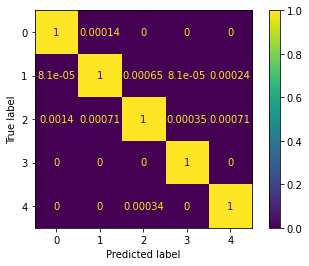

In [41]:
plot_confusion_matrix(mlp, x_test, y_test, normalize="true")

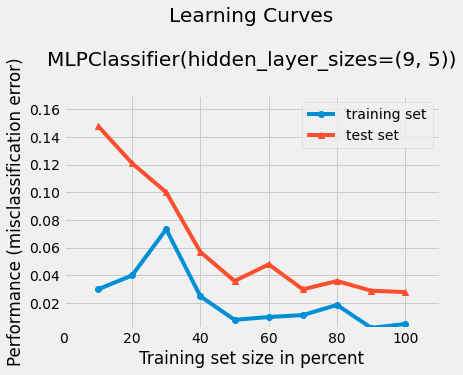

In [42]:
plot_learning_curves(x_train_sample, y_train_sample, x_test_sample, y_test_sample, mlp)
plt.show()

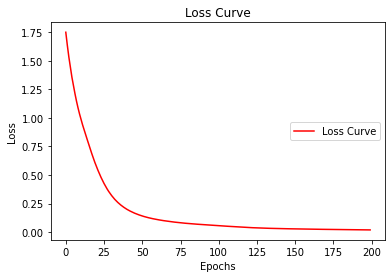

In [43]:
plt.plot(mlp.loss_curve_, color="r", label="Loss Curve")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='center right')
plt.show()

In [44]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10,4,5), activation="identity", solver="adam", random_state=0)
mlp2.fit(x_train,y_train)
y_pred = mlp2.predict(x_test)
print("Multi-Layer Perceptron Classifier model")
print(classification_report(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))

Multi-Layer Perceptron Classifier model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7010
           1       1.00      1.00      1.00     12389
           2       1.00      0.99      0.99      2835
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00      2956

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Accuracy score: 0.9983726929946418


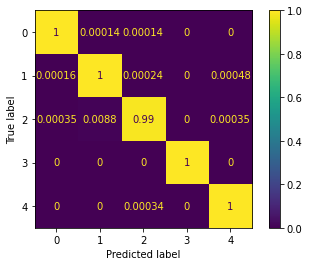

In [45]:
plot_confusion_matrix(mlp2, x_test, y_test, normalize="true")

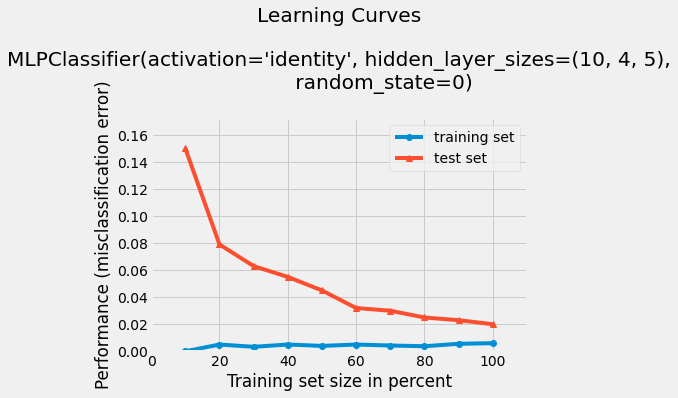

In [46]:
plot_learning_curves(x_train_sample, y_train_sample, x_test_sample, y_test_sample, mlp2)
plt.show()

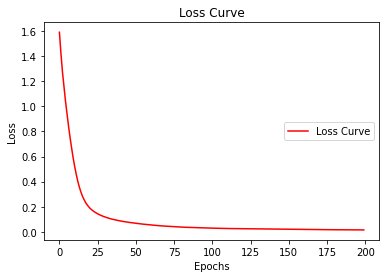

In [47]:
plt.plot(mlp2.loss_curve_, color="r", label="Loss Curve")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='center right')
plt.show()

In [48]:
mlp3 = MLPClassifier(hidden_layer_sizes=(10,4,5), random_state=0)
mlp3.fit(x_train,y_train)
y_pred = mlp3.predict(x_test)
print("Multi-Layer Perceptron Classifier model")
print(classification_report(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))

Multi-Layer Perceptron Classifier model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7010
           1       1.00      1.00      1.00     12389
           2       1.00      1.00      1.00      2835
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00      2956

    accuracy                           1.00     25195
   macro avg       0.96      1.00      0.98     25195
weighted avg       1.00      1.00      1.00     25195

Accuracy score: 0.9984123834094066


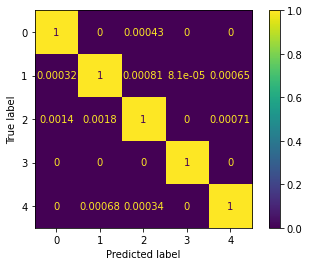

In [49]:
plot_confusion_matrix(mlp3, x_test, y_test, normalize="true")

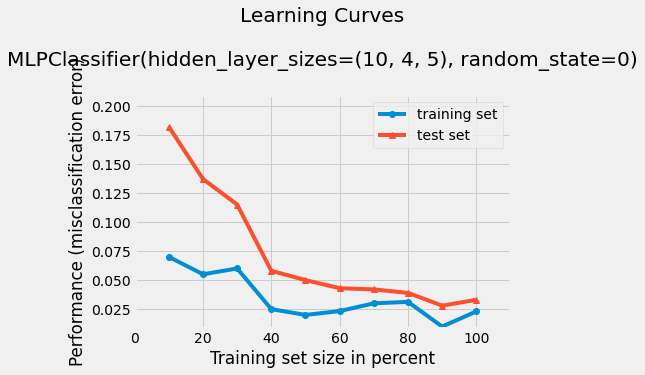

In [50]:
plot_learning_curves(x_train_sample, y_train_sample, x_test_sample, y_test_sample, mlp3)
plt.show()

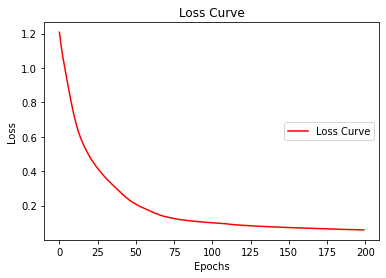

In [51]:
plt.plot(mlp3.loss_curve_, color="r", label="Loss Curve")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='center right')
plt.show()

In [52]:
estimators = [("mlp", mlp), ("mlp2", mlp2), ("mlp3", mlp3)]
en = VotingClassifier(estimators=estimators, voting="hard")
en.fit(x_train, y_train)

VotingClassifier(estimators=[('mlp', MLPClassifier(hidden_layer_sizes=(9, 5))),
                             ('mlp2',
                              MLPClassifier(activation='identity',
                                            hidden_layer_sizes=(10, 4, 5),
                                            random_state=0)),
                             ('mlp3',
                              MLPClassifier(hidden_layer_sizes=(10, 4, 5),
                                            random_state=0))])

# Ensemble

The data is re-ensembled after creating models of MLP on the dataset that was classed with K-Means clustering.

In [53]:
y_pred = en.predict(x_test)
print("Ensembled model")
print(classification_report(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))

Ensembled model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7010
           1       1.00      1.00      1.00     12389
           2       1.00      1.00      1.00      2835
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00      2956

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Accuracy score: 0.9989283588013494


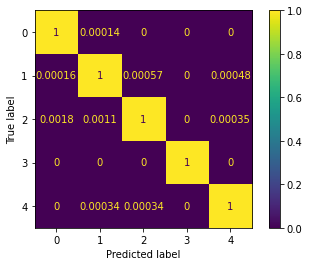

In [54]:
plot_confusion_matrix(en, x_test, y_test, normalize="true")

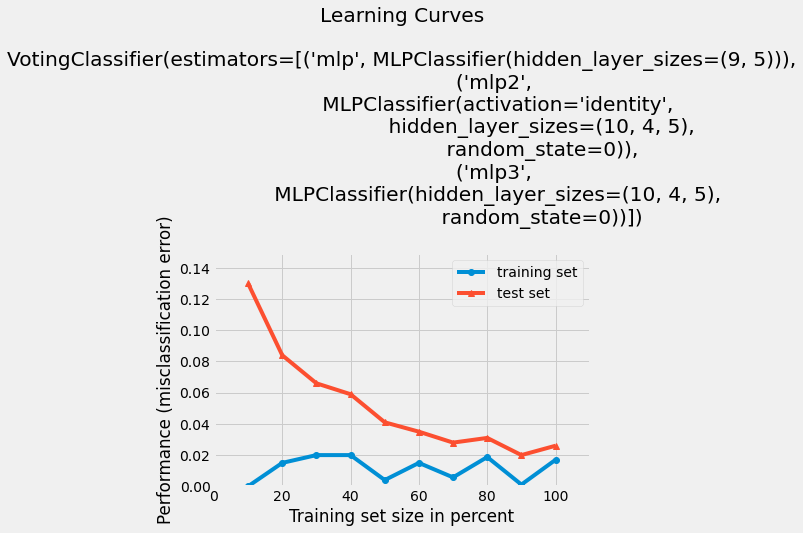

In [55]:
plot_learning_curves(x_train_sample, y_train_sample, x_test_sample, y_test_sample, en)
plt.show()